In [1]:
from pre_processing import Pre_Process
from LDA import LDA,GensimLDA,LDA_DOCS
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
QA=Pre_Process('../business_text_mining/crawl_result/wineQ&A_text.json').clean_data()

In [3]:
D=Pre_Process().Check_date(QA)
print('VAR',D.var())
import chart_studio.plotly.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
layout1 = cf.Layout(
    height=500,
    width=1000
)
#D.iplot(kind='bar',colors='Red',layout=layout1)

VAR 45.29108991422661


컨텐츠의 최대 길이 : 2011
컨텐츠의 평균 길이 : 162.82191590086327


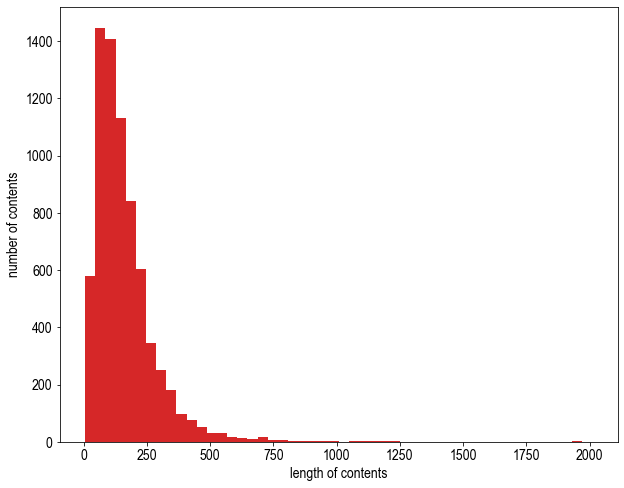

In [4]:
Pre_Process().show_contents_length(QA)

In [5]:
QA=Pre_Process().Get_unique_nouns(QA)

training was done. used memory 0.394 Gbry 0.263 Gb
all cohesion probabilities was computed. # words = 59465
all branching entropies was computed # words = 39925
all accessor variety was computed # words = 39925


100%|██████████| 7182/7182 [00:04<00:00, 1638.97it/s]


,0,1
88,없다,1378
461,싸다,1207
132,가격,1106
106,괜찮다,1042
265,추천,1026
...,...,...
438,공기,29
421,푸나무,29
1034,테이스,29
695,최저,29


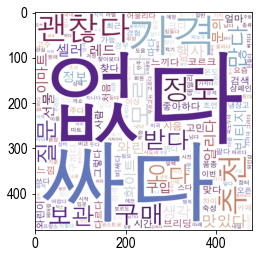

In [6]:
Pre_Process().Get_Nouns_Freq(QA,600,True)

In [7]:
import re
def get_text_with_word(word):
    l=re.findall('(ㅠㅠ)',word)
    L=re.findall('(ㅜㅜ)',word)
    i=re.findall('(\?\?)',word)
    return len(l)+len(i)+len(L)

In [8]:
QA['pain']=QA.contents.apply(lambda x :'pain' if get_text_with_word(x) != 0 else '')
PAIN=QA[QA.pain!='']

In [9]:
PAIN=QA[QA.pain!='']

# LDA

In [35]:
QA,topic_df=LDA_DOCS(QA,3)

Topic 0
추천,받다,선물,모르다,어울리다,검색,많다,맛있다,괜찮다,주다,와린,오다,가격,없다,요즘,카페,사진,찾다,정보,종류
Topic 1
보관,괜찮다,정도,셀러,코르크,브리딩,따다,시간,없다,질문,오픈,샴페인,냉장고,싸다,크다,온도,방법,경우,넣다,남다
Topic 2
가격,싸다,구매,행사,없다,빈티지,이마트,팔다,구하다,시음,사람,판매,문의,알리다,괜찮다,코스트코,장터,정도,정보,느낌


In [36]:
def closer_look(df, topic_num, contents,limit=40):
    each_topic_df = df[df['topic label'] == topic_num]
    DF=each_topic_df[['topic prob', '제목', '본문', '댓글','NOUNS']].sort_values(by='topic prob', ascending=False)
    return DF[contents][:limit]

In [41]:
closer_look(QA,2,['제목'])

,제목
5968,"이마트24, '올드 빈티지 와인' 3종 한정 판매 <- 문의"
6874,보르도 그랑끄뤼 2013빈 문의드림니다
6007,혹시 오크숙성향을 싫어하시는 분 계신가요..??
6991,카이켄 울트라 말벡 가격
228,칠레 와인 비교
6865,수퍼 투스칸급 이태리 와인 싸게 파는 곳 있나요?
7139,아마로네 판매처가 궁금합니다.
7104,혹시 Robert Weil 리슬링 트레이더스 월계점이나 고양점에 있는지 궁금합니다
6666,마트 장터는 와인샵 처럼 주문이 되나요?
5951,Clos Du Val Napa 까쇼 2016 라벨에 ESTATE 표기 없는 이유


In [43]:
QA.to_csv('LDA_QA.csv',encoding='utf-8')

# gensim

In [ ]:
vis=GensimLDA(QA,3)
pyLDAvis.display(vis)